In [1]:
import numpy as np
import pypianoroll as pr
import data_util

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x112bca518>])

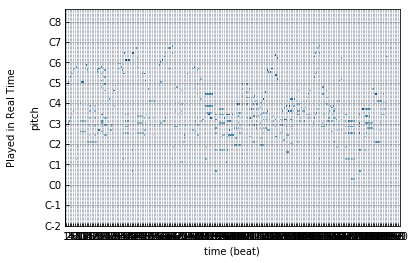

In [56]:
sample_jazz_midi = pr.parse('./data/jazz/Chelsea Bridge.mid',beat_resolution=32)
sample_jazz_midi.plot()

In [58]:
sample_jazz_pianoroll = sample_jazz_midi.tracks[0].pianoroll

from mido import MidiFile
midi_path = './data/jazz/Chelsea Bridge.mid'
midi_file = MidiFile(midi_path)

print("music played {} seconds".format(midi_file.length))

t=midi_file.tracks[0]
print("track0 has {} messages".format(len(t)))   

import operator
t.sort(key=operator.attrgetter('time'))


time_sig_msgs = [ msg for msg in t if msg.type == 'note_on']
print("track0 has {} messages".format(len(time_sig_msgs)))

#print([time_sig_msg for time_sig_msg in time_sig_msgs if time_sig_msg.time==100])

#if msg.type == 'time_signature'

print(sample_jazz_pianoroll.shape) # (4800 timestamps, 128 pitchs)
roll_100 = sample_jazz_pianoroll[100]

print("At timestamp 100:")
print(roll_100)
for i,x in enumerate(roll_100):
    if x != 0:
        print(" pitch {} is pressed with velocity {}".format(i, x))

        
roll_100 = sample_jazz_pianoroll[101]

print("At timestamp 100:")
print(roll_100)
for i,x in enumerate(roll_100):
    if x != 0:
        print(" pitch {} is pressed with velocity {}".format(i, x))        

music played 171.085742800001 seconds
track0 has 1406 messages
track0 has 1270 messages
(6400, 128)
At timestamp 100:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 54  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
 pitch 63 is pressed with velocity 54
 pitch 87 is pressed with velocity 69
At timestamp 100:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 54  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
 pitch

In [4]:
# jazz_pianoroll contains the velocity information and this is just we want for label Y
sample_jazz_y = sample_jazz_pianoroll
# x holds information of which pitch is on for each timestamp. 
# For now we simplily diffentiate on(1) and off(0). 
# Later for 'on', we should diffentiate velocity > 0(articulated) and veloctity = 0(sustained)
sample_jazz_x = (sample_jazz_pianoroll > 0) * 1

print("At timestamp 100:")
print("sample_jazz_x: ", sample_jazz_x[100])
print("sample_jazz_y: ", sample_jazz_y[100])

At timestamp 100:
sample_jazz_x:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
sample_jazz_y:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]


In [5]:
X, Y = data_util.load('jazz')

X shape: (349, 500, 88)
Y shape: (349, 500, 88)


In [6]:
from poc_model import SimpleLSTM
poc_model = SimpleLSTM()
poc_model.prepare()
poc_model.train_batch(X, Y, 0)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500, 88)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 88)           62304     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 88)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 64)           39168     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 500, 88)           5720      
_________________________________________________________________
lambda_1 (Lambda)            (None, 500, 88)           0         
Total para

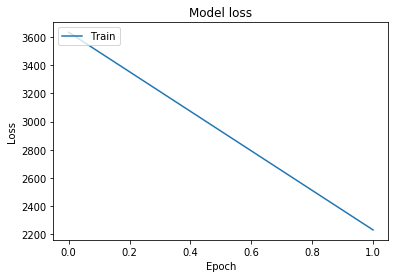

In [7]:
from seq2seq_model import Seq2SeqLSTM
seq2seq_model = Seq2SeqLSTM(500)
seq2seq_model.prepare()
seq2seq_model.train(X, Y, 2)   # train only 2 batchs for quick demo. In main.py we change to 1000 for actual train

In [8]:
sample_classical_x, _ = data_util.parse('./data/jazz/Chelsea Bridge.mid')

# y_pred = poc_model.predict(sample_classical_x)
# y_pred = [np.round(yt) for yt in y_pred]
# print('from poc model:', y_pred)

y_pred = seq2seq_model.predict(sample_classical_x)
y_pred = [np.round(yt) for yt in y_pred]
print('\nfrom seq2seq model:', y_pred)


from seq2seq model: [array([[62., 62., 61., ..., 62., 62., 62.],
       [61., 60., 60., ..., 62., 60., 60.],
       [59., 59., 57., ..., 62., 59., 58.],
       ...,
       [18., 14.,  7., ..., 46., 16., 10.],
       [18., 14.,  7., ..., 46., 16., 10.],
       [18., 14.,  7., ..., 46., 16., 10.]], dtype=float32)]


In [9]:
#data_util.save(y_pred[0], 'output/classical/Chelsea Bridge transferred.mid')

matrix=y_pred[0]
filename='output/classical/Chelsea Bridge transferred.mid'
print(matrix.shape)
matrix = np.pad(matrix, (21,19), 'constant', constant_values=(0, 0))[21:521]
print(matrix.shape)
track = pr.Track(pianoroll=matrix, program=0, is_drum=False, name='classic music transferred from jazz')
multitrack = pr.Multitrack(tracks=[track])
pr.utilities.write(multitrack, filename)
print("{} saved".format(filename))

(500, 88)
(500, 128)
output/classical/Chelsea Bridge transferred.mid saved
